# 1. ADVERTISING_REGRESI LINEAR

### DATA UNDERSTANDING

In [599]:
import pandas as pd
import numpy as np
import math

# plot
import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict
from sklearn.preprocessing import StandardScaler, Imputer

# split data
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

# regresi linear
import sklearn
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# regresi logistik
from sklearn.linear_model import LogisticRegression


# model
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# accuracy
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [600]:
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [601]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


- kolom target (variabel Y) adalah sales
- kolom variabel independen (variabel x) adalah TV, radio, newspaper

In [602]:
df.shape

(200, 4)

In [603]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [604]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [605]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### VISUALIZATION

- Data TV, radio, newspaper, sales adalah numerik

### BOX PLOT
- digunakan untuk membandingkan penyebaran data antar grup
- https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

[Text(0,0.5,'newspaper'), Text(0.5,1,'Boxplot on Newspaper')]

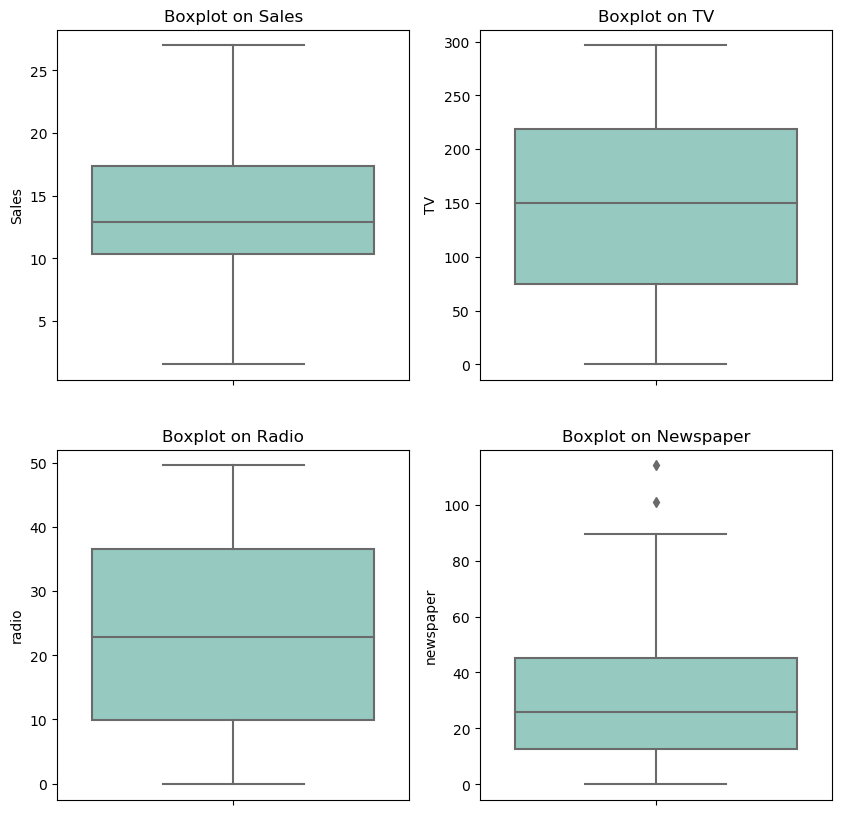

In [606]:
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 10)

sns.boxplot(data=df,y="sales",orient="v",ax=ax[0][0],palette="Set3")
ax[0][0].set(ylabel="Sales", title="Boxplot on Sales")

sns.boxplot(data=df,y="TV",orient="v",ax=ax[0][1],palette="Set3")
ax[0][1].set(ylabel="TV", title="Boxplot on TV")

sns.boxplot(data=df,y="radio",orient="v",ax=ax[1][0],palette="Set3")
ax[1][0].set(ylabel="radio", title="Boxplot on Radio")

sns.boxplot(data=df,y="newspaper",orient="v",ax=ax[1][1],palette="Set3")
ax[1][1].set(ylabel="newspaper", title="Boxplot on Newspaper")

berdasarkan boxplot di atas, terdapat outlier pada data newspaper

### DENSITY, HISTOGRAM PLOT

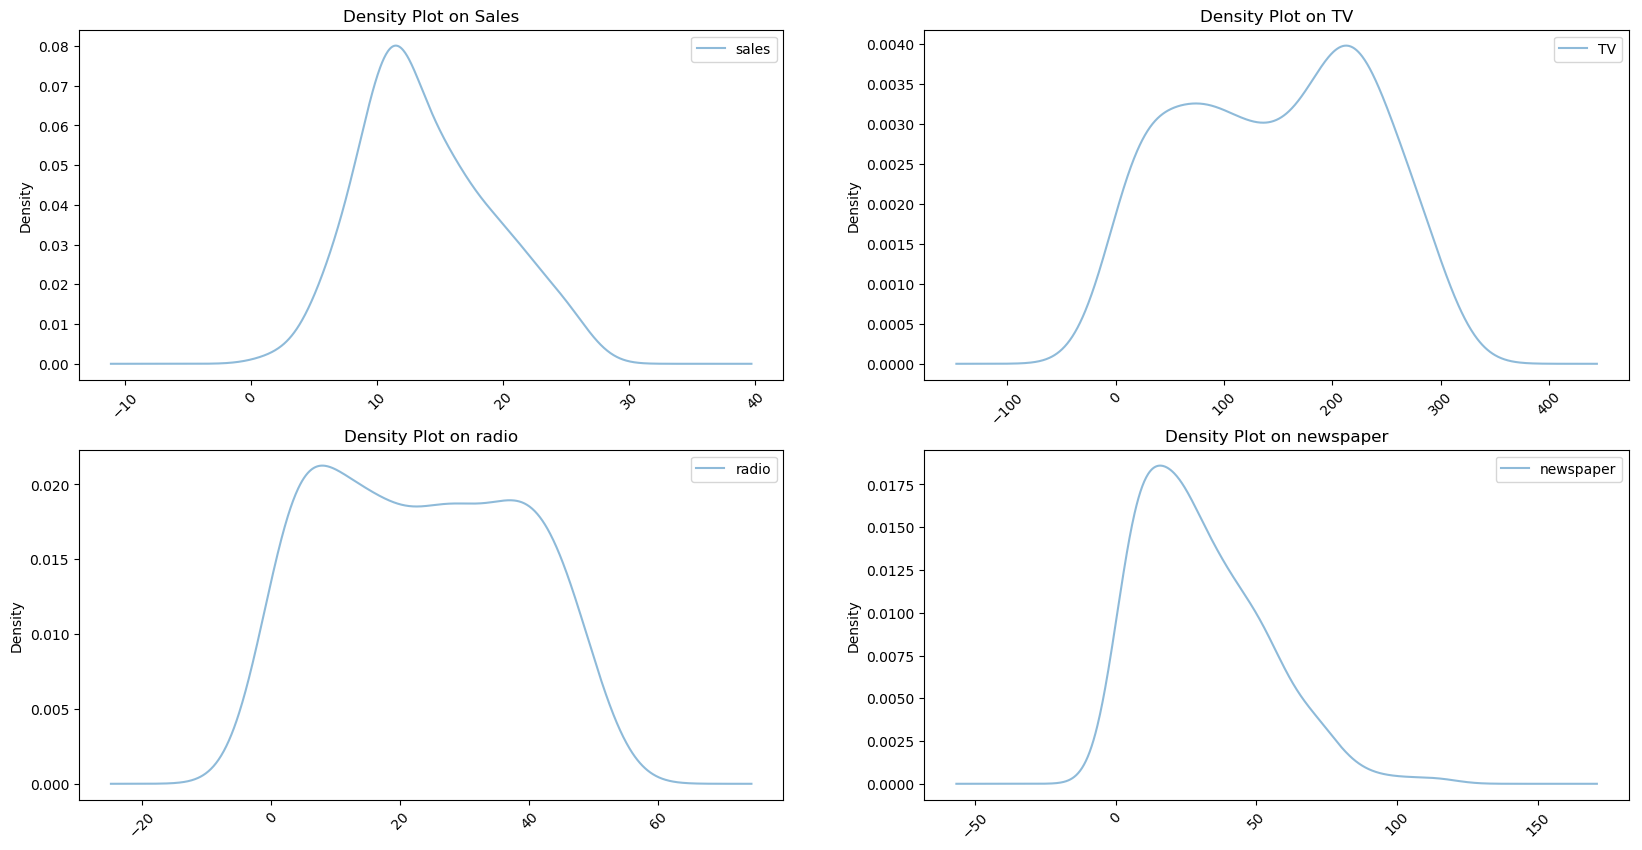

In [607]:
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)

df['sales'].plot.density(alpha=0.5, legend=True, title='Density Plot on Sales', ax=ax[0][0], rot=45)
df['TV'].plot.density(alpha=0.5, legend=True, title='Density Plot on TV', ax=ax[0][1], rot=45)
df['radio'].plot.density(alpha=0.5, legend=True, title='Density Plot on radio', ax=ax[1][0], rot=45)
df['newspaper'].plot.density(alpha=0.5, legend=True, title='Density Plot on newspaper', ax=ax[1][1], rot=45)


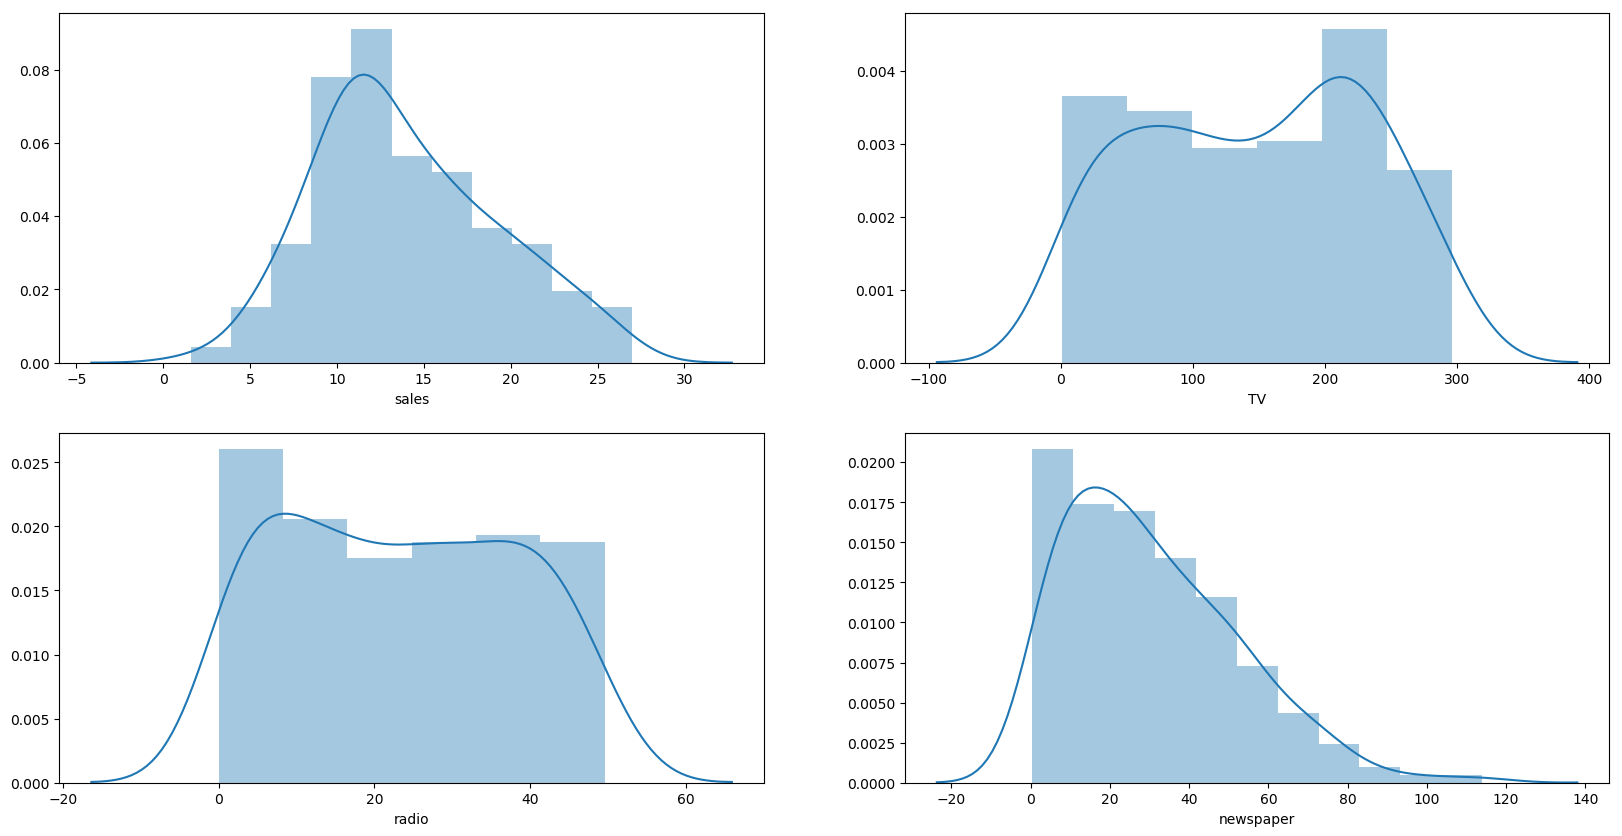

In [608]:
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)

sns.distplot(df['sales'], ax=ax[0][0])
sns.distplot(df['TV'], ax=ax[0][1])
sns.distplot(df['radio'], ax=ax[1][0])
sns.distplot(df['newspaper'], ax=ax[1][1])

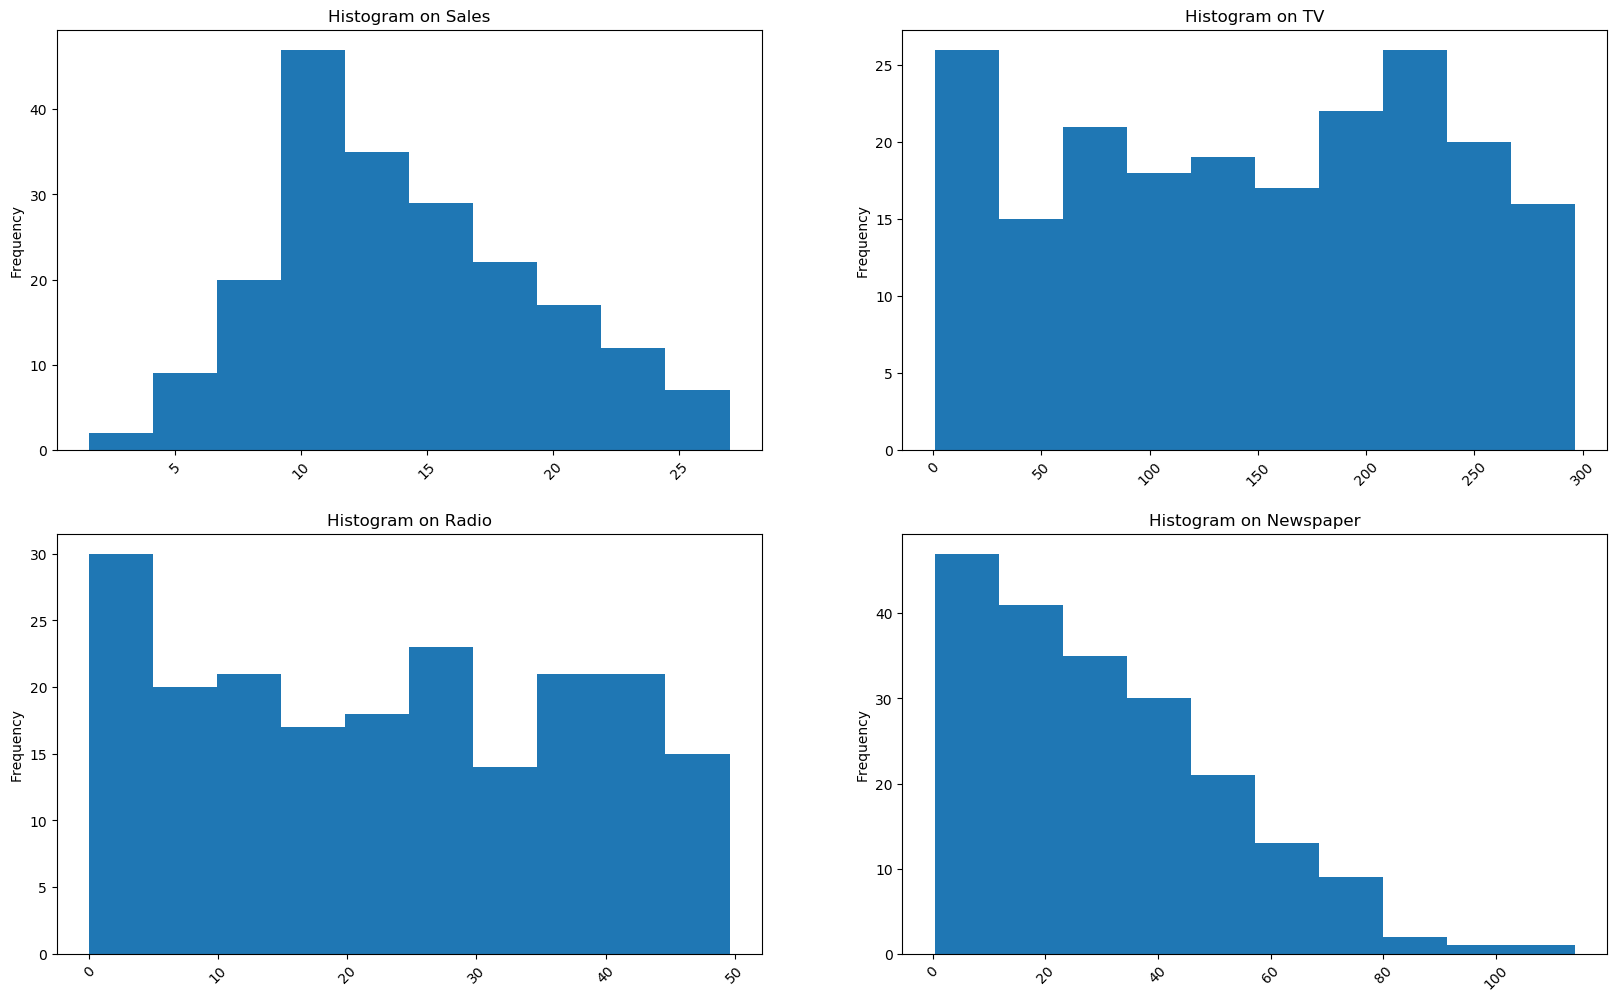

In [609]:
fig, ax = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 12)

df['sales'].plot.hist(title="Histogram on Sales",ax=ax[0][0], rot=45)
df['TV'].plot.hist(title="Histogram on TV",ax=ax[0][1], rot=45)
df['radio'].plot.hist(title="Histogram on Radio",ax=ax[1][0], rot=45)
df['newspaper'].plot.hist(title="Histogram on Newspaper",ax=ax[1][1], rot=45)

- data sales kebanyakan ada pada interval 10-15
- data TV kebanyakan ada pada interval 200-250
- data radio kebanyakan ada pada interval (?)
- data newspaper kebanyakan ada pada interval 10-30

### LM PLOT

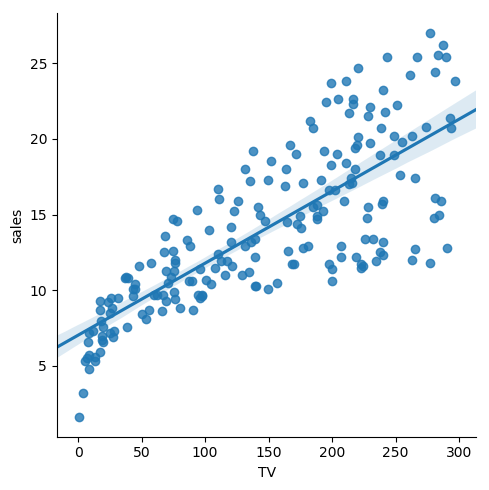

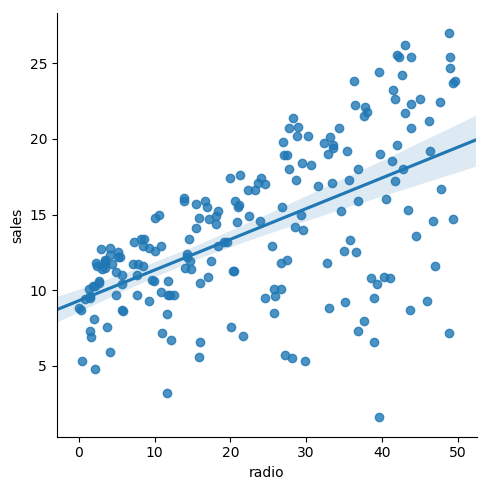

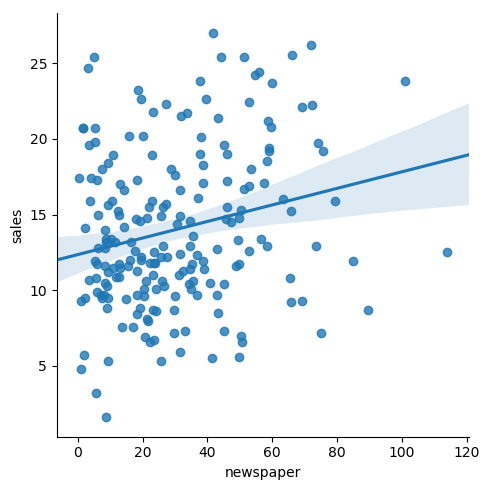

In [610]:
plt.style.use('default')
# fig, ax = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(20, 12)

ax1 = sns.lmplot(x='TV',y='sales',data=df)
plt.show()

sns.lmplot(x='radio',y='sales',data=df)
plt.show()

sns.lmplot(x='newspaper',y='sales',data=df)
plt.show()

- data TV menyebar disekitar garis regresi
- data radio menyebar disekita garis regresi, namun pada bagian bawah garis data menyebar lebih luas
- data newspaper menyebar seacara acak di atas dan dibawah garis regresi

In [611]:
corr = df[["TV","radio","newspaper","sales"]].corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [612]:
mask = np.array(corr)
mask

array([[1.        , 0.05480866, 0.05664787, 0.78222442],
       [0.05480866, 1.        , 0.35410375, 0.57622257],
       [0.05664787, 0.35410375, 1.        , 0.22829903],
       [0.78222442, 0.57622257, 0.22829903, 1.        ]])

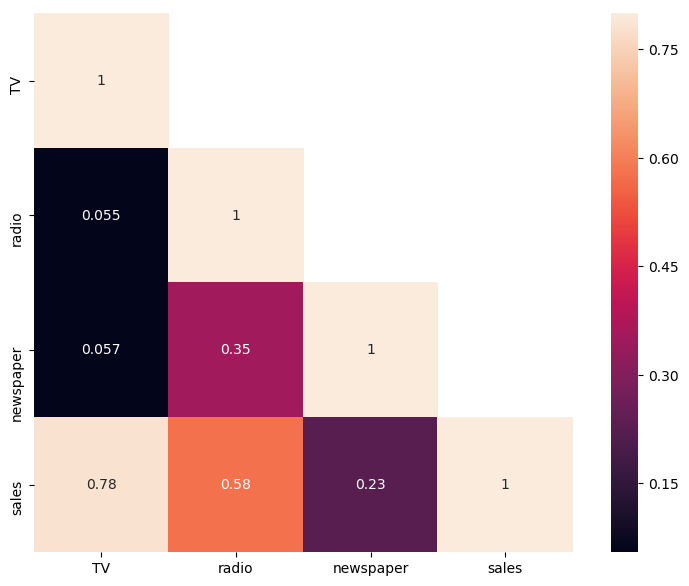

In [613]:
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,7)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

- terdapat korelasi positif dan kuat pada variabel TV terhadap sales (0,78), 
- korelasi radio terhadap sales cukup kuat (0,58)
- korelasi newspaper positif tetapi tidak kuat (0,23)

-**lihat kembali lmplot, hasil korelasi sesuai penyebaran data pada lmplot**

## MODELLING

In [614]:
# lm = LinearRegression()
lm = smf.ols(formula = 'sales~TV+radio+newspaper',data=df).fit()

In [615]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.58e-96
Time:                        22:36:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**UJI F SIMULTAN**
- Hipotesis:
   - H0 : tidak ada variabel x yang berpengaruh terhadap variabel Y
   - H1 : ada minimal 1 variabel x yang berpengaruh terhadap variabel Y
- Daerah Kritis : H0 ditolak jika p-value < 0,05
- Keputusan : H0 ditolak, karena p-value 1,58e-96 < 0,05
- Kesimpulan : ada minimal 1 variabel x yang berpengaruh terhadap variabel Y

**UJI t**
**variabel TV**
- Hipotesis:
   - H0 : variabel TV yang berpengaruh terhadap variabel sales
   - H1 : variabel TV yang berpengaruh terhadap variabel sales
- Daerah Kritis : H0 ditolak jika p-value < 0,05
- Keputusan : H0 ditolak, karena p-value 0,00 < 0,05
- Kesimpulan : variabel TV berpengaruh terhadap variabel sales
    
**variabel radio**
- Hipotesis:
   - H0 : variabel radio yang berpengaruh terhadap variabel sales
   - H1 : variabel radio yang berpengaruh terhadap variabel sales
- Daerah Kritis : H0 ditolak jika p-value < 0,05
- Keputusan : H0 ditolak, karena p-value 0,00 < 0,05
- Kesimpulan : variabel radio berpengaruh terhadap variabel sales
    
**variabel newspaper**
- Hipotesis:
   - H0 : variabel newspaper yang berpengaruh terhadap variabel sales
   - H1 : variabel newspaper yang berpengaruh terhadap variabel sales
- Daerah Kritis : H0 ditolak jika p-value < 0,05
- Keputusan : H0 ditolak, karena p-value 0,860 < 0,05
- Kesimpulan : variabel newspaper tidak berpengaruh terhadap variabel sales

In [616]:
lm2 = smf.ols(formula = 'sales~TV+radio',data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.58e-96
Time:                        22:36:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**UJI F SIMULTAN**
- Hipotesis:
   - H0 : tidak ada variabel x yang berpengaruh terhadap variabel Y
   - H1 : ada minimal 1 variabel x yang berpengaruh terhadap variabel Y
- Daerah Kritis : H0 ditolak jika p-value < 0,05
- Keputusan : H0 ditolak, karena p-value 1,58e-96 < 0,05
- Kesimpulan : ada minimal 1 variabel x yang berpengaruh terhadap variabel Y

**UJI t**
- variabel TV
- Hipotesis:
   - H0 : variabel TV tidak berpengaruh terhadap variabel sales
   - H1 : variabel TV yang berpengaruh terhadap variabel sales
- Daerah Kritis : H0 ditolak jika p-value < 0,05
- Keputusan : H0 ditolak, karena p-value 0,00 < 0,05
- Kesimpulan : variabel TV yang berpengaruh terhadap variabel sales
    
- variabel radio
- Hipotesis:
   - H0 : variabel radio tidak berpengaruh terhadap variabel sales
   - H1 : variabel radio yang berpengaruh terhadap variabel sales
- Daerah Kritis : H0 ditolak jika p-value < 0,05
- Keputusan : H0 ditolak, karena p-value 0,00 < 0,05
- Kesimpulan : variabel radio yang berpengaruh terhadap variabel sales

### UJI ASUMSI

### NORMALITAS

In [617]:
from scipy import stats
stats.shapiro(lm2.resid)

(0.9180378317832947, 4.190036317908152e-09)

**Shapiro_wilk test**

- Ho : residual berdistribusi normal
- Ha : residual tidak berdistribusi normal
- p-value 4,19e-09 < 0,05 sehingga Ho ditolak
- Kesimpulan : residual tidak berdistribusi normal

### AUTOKORELASI

In [618]:
from statsmodels.stats import diagnostic
diagnostic.acorr_ljungbox(lm2.resid, lags=1)

(array([0.41670406]), array([0.51858625]))

### HETEROSKEDASTISITAS

In [619]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
test = sms.het_goldfeldquandt(lm2.resid,lm2.model.exog)
test

(1.3362916409729566, 0.07759526517366408, 'increasing')

- H0 : error term are homoscedacity
- H1 : error term are heteroscedacity
- p-value > 0.05 maka H0 gagal ditolak, sehingga error term are homoscedacity

### MULTIKOLINEARITY

In [620]:
VIF = df[['TV','radio']]
[variance_inflation_factor(VIF.values,j) for j in range(VIF.shape[1])]

[2.2380849001658536, 2.238084900165853]

nilai VIF TV dan radio < 4
tidak terdapat multikolinearity

- Akaike Info Criteria (AIC) > semakin kecil maka model semakin bagus
- Bayesian Info Criteria (BIC) > semakin kecil semakin bagus modelnya
- AIC dan BIC digunakan untuk membandingkan antar model

### R2

- Adj-R2 sebesar 89,6%, maka variabel TV dan radio dapat menjelaskan variabel sales sebesar 89,6%, 
- sisanya sebesar 100-89,6% dijelaskan oleh variabel lain diluar model

### Interpretasi Model

**sales = 2.9211 + 0,0458 TV + 0,1880 radio**

- value sales akan meningkat sebesar 0,0458 untuk setiap kenaikan 1 satuan value TV 
- value sales akan meningkat sebesar 0,1880 untuk setiap kenaikan 1 satuan value radio

# 2. CREDIT_Logistic, Decision Tree

In [621]:
kredit=pd.read_csv('credit_training.csv', sep=',',index_col=0)
kredittesting = pd.read_csv('credit_testing.csv', sep=',',index_col=0)

In [622]:
kredit.shape

(16625, 9)

In [623]:
kredit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16625 entries, 1 to 16625
Data columns (total 9 columns):
LIMIT_BAL    16625 non-null float64
MARRIAGE     16625 non-null int64
EDUCATION    16625 non-null int64
SEX          16625 non-null int64
AGE          16625 non-null int64
BILL_AMT1    16625 non-null float64
BILL_AMT2    16625 non-null float64
BILL_AMT3    16625 non-null float64
TARGET       16625 non-null int64
dtypes: float64(4), int64(5)
memory usage: 1.3 MB


### MENGKATEGORIKAN DATA

In [624]:
kredit["MARRIAGE"] = kredit["MARRIAGE"].map({1: "married", 2 : "single", 3 : "divorce/others"})
kredit["EDUCATION"] = kredit["EDUCATION"].map({1: "SMA", 2 : "S1", 3 : "S2", 4 : "S3" })
kredit["SEX"] = kredit["SEX"].map({1: "male", 2 : "female" })
kredit["TARGET"] = kredit["TARGET"].map({0 : "tepat", 1 : "telat" })

In [625]:
kredit.head(5)

,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET
ID,,,,,,,,,
1,30000.0,married,SMA,female,40,24607.0,24430.0,23881.0,tepat
2,20000.0,married,SMA,female,41,17040.0,16474.0,17203.0,tepat
3,20000.0,married,SMA,female,36,17332.0,18600.0,17947.0,tepat
4,20000.0,married,SMA,female,35,2003.0,2948.0,3372.0,tepat
5,170000.0,married,SMA,female,38,171465.0,145196.0,110163.0,tepat


In [626]:
categoryVariableList = ["MARRIAGE","EDUCATION","SEX","TARGET"]
for var in categoryVariableList:
    kredit[var] = kredit[var].astype("category")

In [627]:
kredit.dtypes

LIMIT_BAL     float64
MARRIAGE     category
EDUCATION    category
SEX          category
AGE             int64
BILL_AMT1     float64
BILL_AMT2     float64
BILL_AMT3     float64
TARGET       category
dtype: object

In [628]:
kredit.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3
count,16625.000000,16625.000000,16625.000000,16625.000000,16625.000000
mean,157608.781955,43.373955,50720.634827,48815.920662,46471.030556
std,124931.062684,8.777974,73365.449060,70753.129768,68182.984755
min,0.000000,20.000000,-165580.000000,-69777.000000,-61506.000000
25%,50000.000000,37.000000,3491.000000,2997.000000,2550.000000
50%,120000.000000,42.000000,21943.000000,20987.000000,19954.000000
75%,230000.000000,49.000000,65903.000000,62725.000000,59111.000000
max,800000.000000,72.000000,746814.000000,646770.000000,693131.000000


# EXPLORATORY DATA ANALYSIS

## DENSITY, HISTOGRAM PLOT

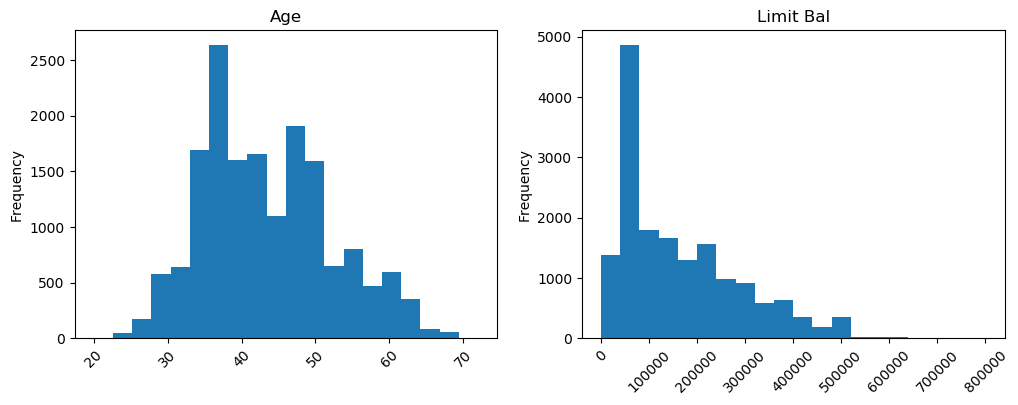

In [629]:
plt.figure(figsize=(12,4))
plt.subplot(121)
kredit['AGE'].plot.hist(bins=20, title='Age',rot=45)
plt.subplot(122)
kredit['LIMIT_BAL'].plot.hist(bins=20, title='Limit Bal',rot=45)
plt.show()

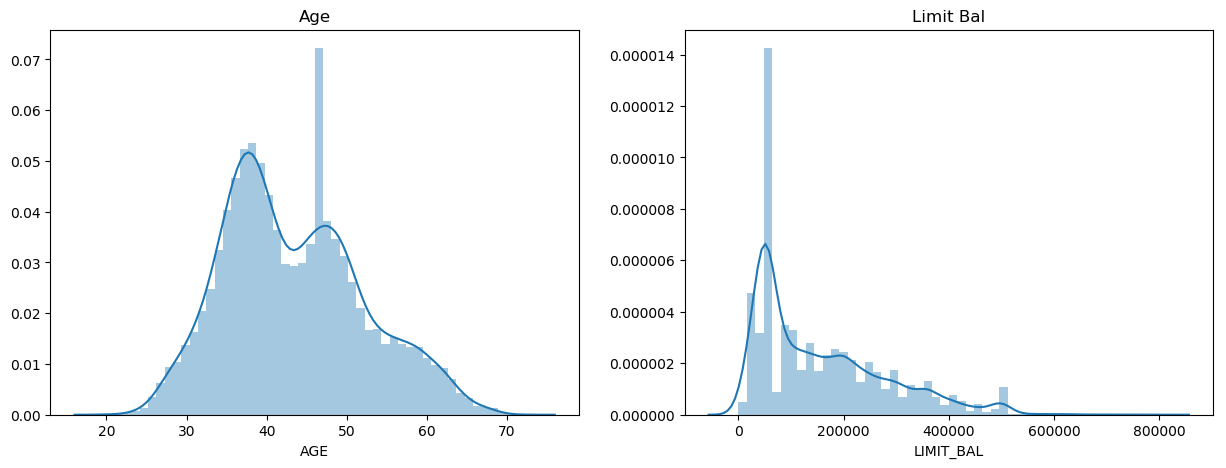

In [630]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(kredit['AGE']).set_title('Age')
plt.subplot(122)
sns.distplot(kredit['LIMIT_BAL']).set_title('Limit Bal')
plt.show()

- Orang yang kredit kebanyakan adalah orang dengan umur berkisar 30-40 tahun
- Limit balance kredit berada pada kisaran 50000-100000
- Limit balance kredit persebaran datanya skewness positif

**SKEWNESS**
- Kecondongan data ke arah kiri (condong negatif) dimana nilai modus lebih dari nilai mean (modus > mean).
- Kecondongan data simetris (distribusi normal) dimana nilai mean dan modus adalah sama (mean = modus).
- Kecondongan data ke arah kanan (condong positif) dimana nilai mean lebih dari nilai modus (mean > modus).
- http://jam-statistic.blogspot.com/2014/03/uji-normalitas-data-skewness-kurtosis.html

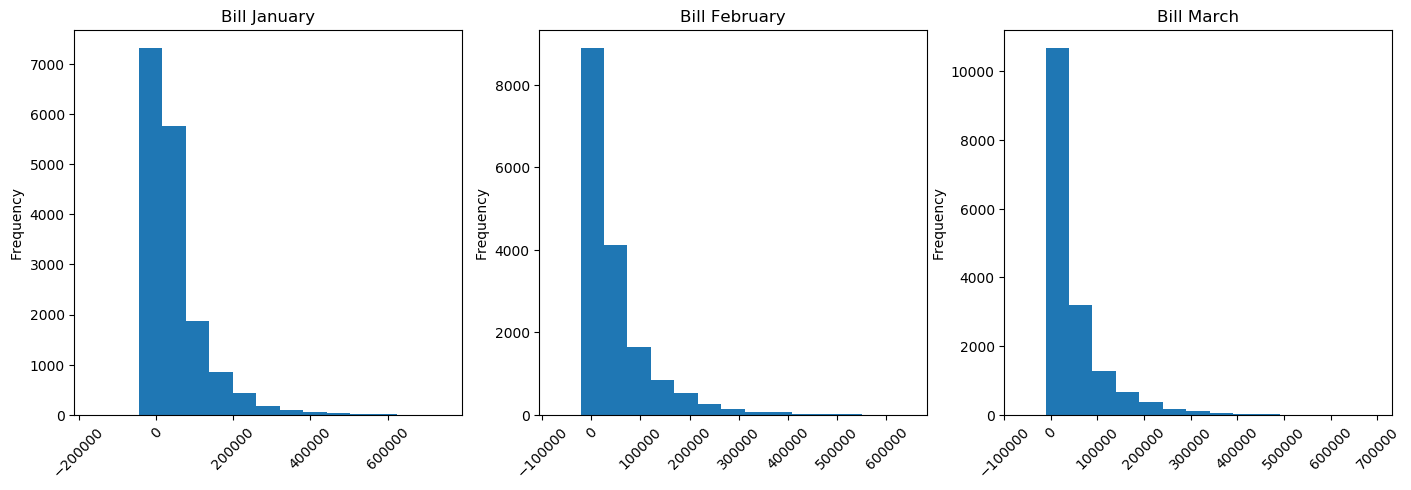

In [631]:
plt.figure(figsize=(17,5))
plt.subplot(131)
kredit['BILL_AMT1'].plot.hist(bins=15, title='Bill January', rot=45)
plt.subplot(132)
kredit['BILL_AMT2'].plot.hist(bins=15, title='Bill February', rot=45)
plt.subplot(133)
kredit['BILL_AMT3'].plot.hist(bins=15, title='Bill March', rot=45)
plt.show()

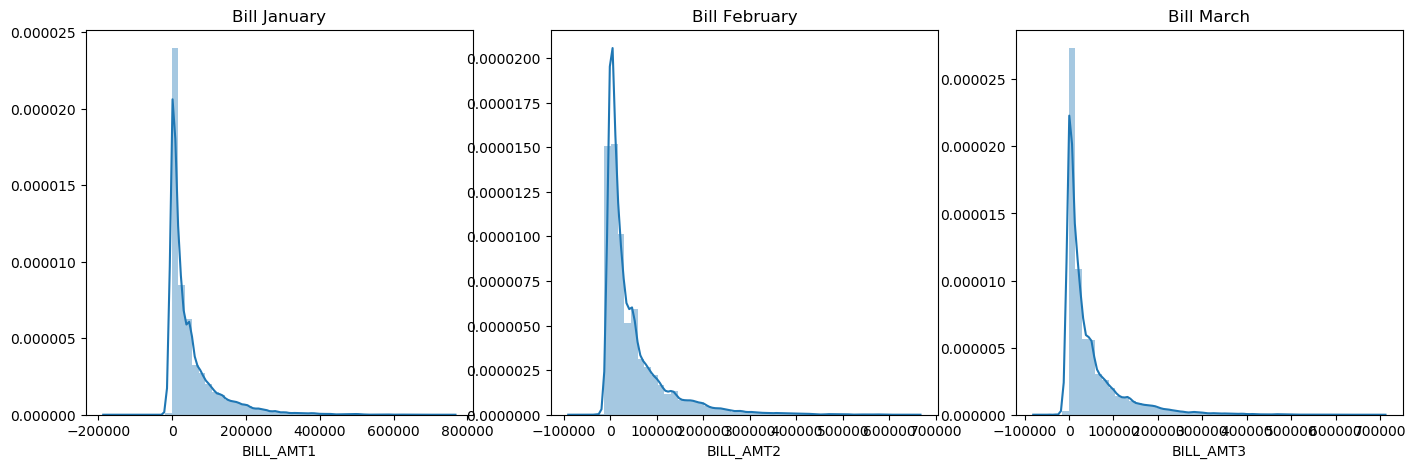

In [632]:
plt.figure(figsize=(17,5))
plt.subplot(131)
sns.distplot(kredit['BILL_AMT1']).set_title('Bill January')
plt.subplot(132)
sns.distplot(kredit['BILL_AMT2']).set_title('Bill February')
plt.subplot(133)
sns.distplot(kredit['BILL_AMT3']).set_title('Bill March')
plt.show()

- BILL_AMT1, BILL_AMT2, BILL_AMT3 skew positif

### TRANSFORMASI

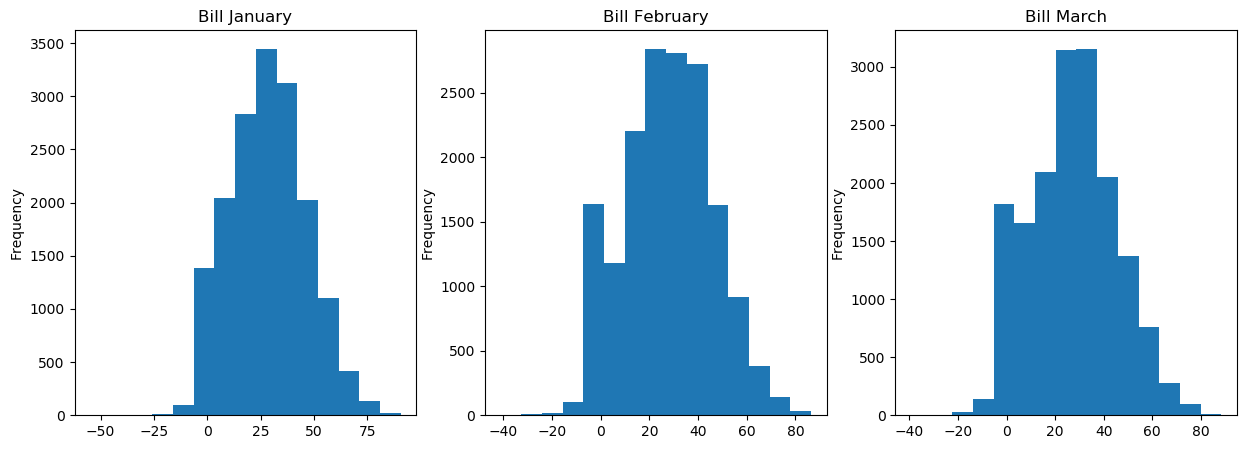

In [633]:
plt.figure(figsize=(15,5))
plt.subplot(131)
kredit['BILL_AMT1'].apply(np.cbrt).plot.hist(bins=15, title='Bill January')
plt.subplot(132)
kredit['BILL_AMT2'].apply(np.cbrt).plot.hist(bins=15, title='Bill February')
plt.subplot(133)
kredit['BILL_AMT3'].apply(np.cbrt).plot.hist(bins=15, title='Bill March')
plt.show()

## BAR PLOT

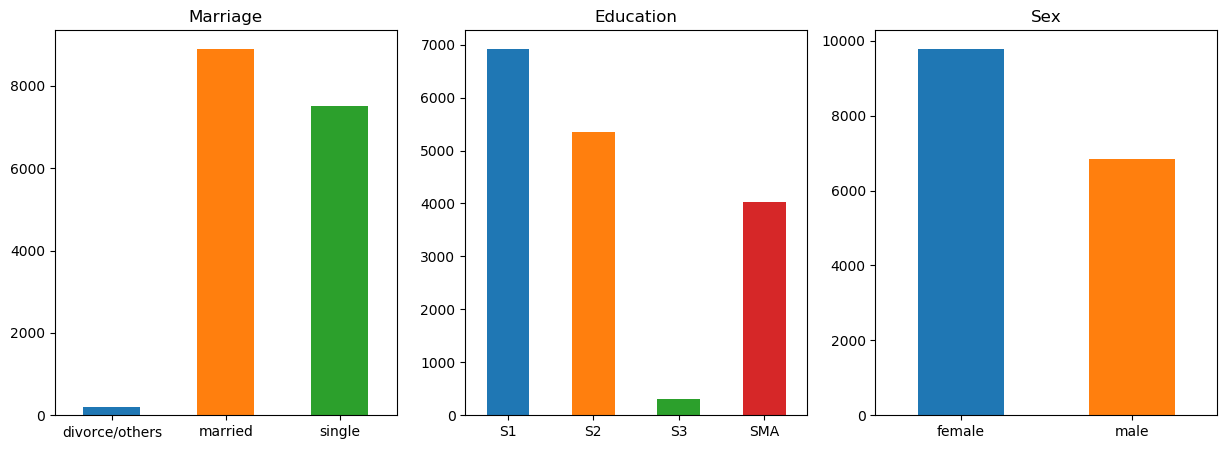

In [634]:
plt.figure(figsize=(15,5))
plt.subplot(131)
kredit['MARRIAGE'].value_counts().sort_index().plot.bar(rot=0, title='Marriage')
plt.subplot(132)
kredit['EDUCATION'].value_counts().sort_index().plot.bar(rot=0, title='Education')
plt.subplot(133)
kredit['SEX'].value_counts().sort_index().plot.bar(rot=0, title='Sex')
plt.show()

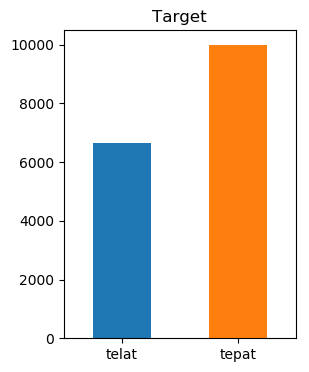

In [635]:
plt.figure(figsize=(3,4))
kredit['TARGET'].value_counts().sort_index().plot.bar(rot=0, title='Target')
plt.show()

[Text(0,0.5,'Count'), Text(0.5,1,'Barplot on Target across Sex')]

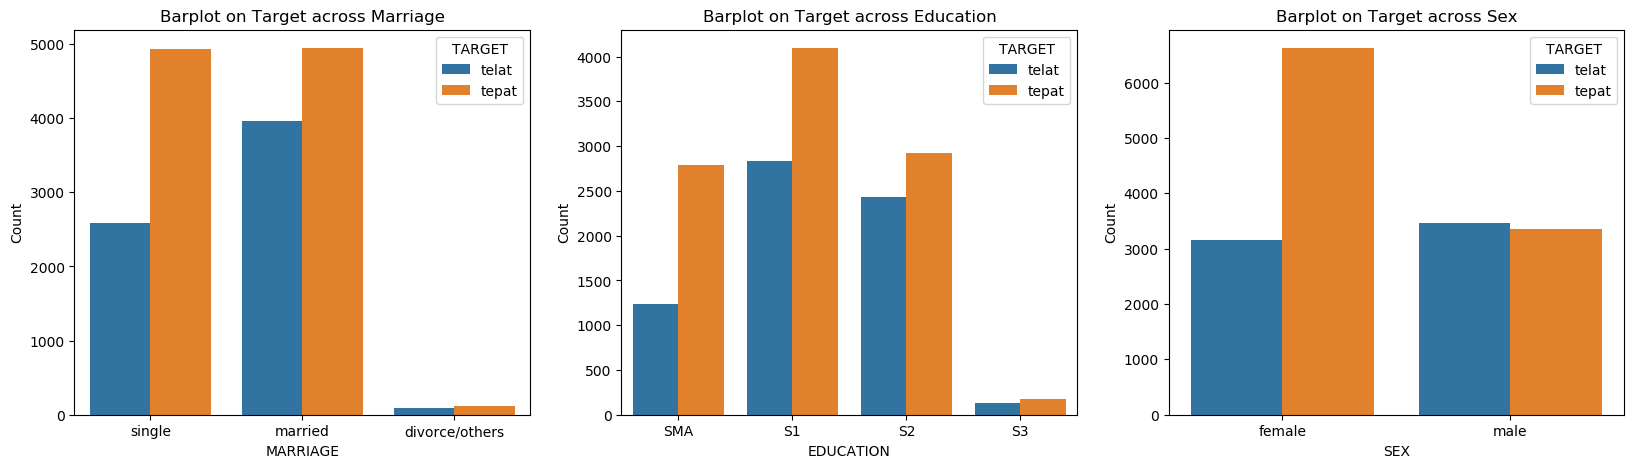

In [636]:
fig,(ax1,ax2,ax3)= plt.subplots(ncols=3)
fig.set_size_inches(20,5)
eduOrder = ["SMA","S1","S2","S3"]
marrOrder = ["single","married","divorce/others"]

sns.countplot(data=kredit, x="MARRIAGE",ax=ax1, hue="TARGET",order=marrOrder)
ax1.set(ylabel="Count", title="Barplot on Target across Marriage")

sns.countplot(data=kredit, x="EDUCATION",ax=ax2, hue="TARGET",order=eduOrder)
ax2.set(ylabel="Count", title="Barplot on Target across Education")

sns.countplot(data=kredit, x="SEX",ax=ax3, hue="TARGET")
ax3.set(ylabel="Count", title="Barplot on Target across Sex")

- Berdasarkan data marriage, orang kredit yang sudah menikah lebih banyak terlambat bayar dibandingkan dengan yang single dan bercerai/lainnya
- Berdasarkan data education, orang kredit yang memiliki pendidikan S1 lebih banyak terlambat bayar dibandingkan dengan yang SMA, S2, dan S3
- Berdasarkan data sex, orang kredit bergender male(laki-laki) lebih banyak terlambat bayar dibandingkan dengan female

### BOX PLOT

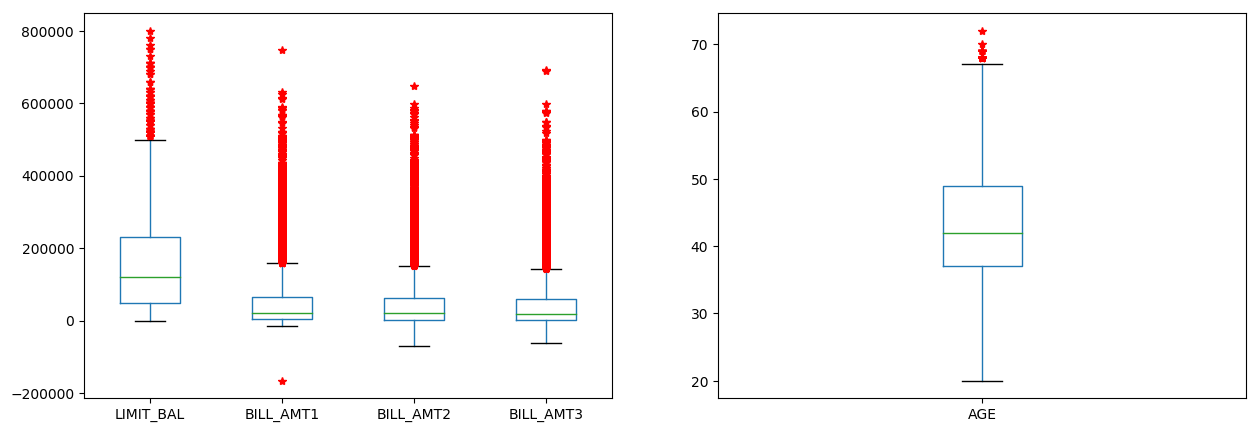

In [637]:
col_list=['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3']
numkredit = kredit[kredit.columns[kredit.columns.isin(col_list)]]

plt.figure(figsize=(15,5))
plt.subplot(121)
numkredit.boxplot(sym='r*',grid=False)
plt.subplot(122)
kredit[['AGE']].boxplot(sym='r*', grid=False)
plt.show()

**Numeric Variable vs Target**

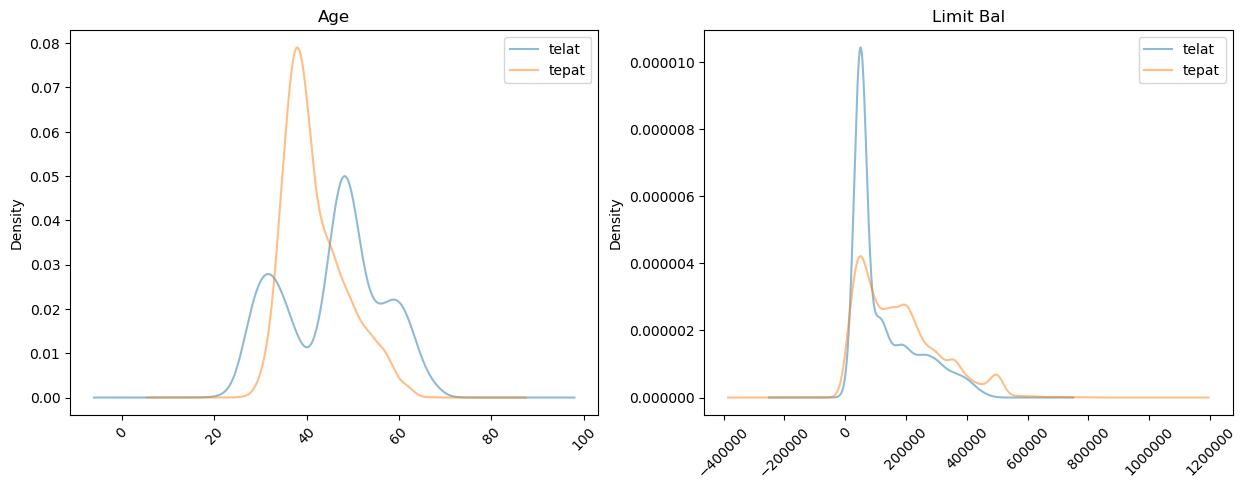

In [638]:
plt.figure(figsize=(15,5))
plt.subplot(121)
kredit.groupby('TARGET').AGE.plot.density(alpha=0.5, legend=True, title='Age', rot=45)
plt.subplot(122)
kredit.groupby('TARGET').LIMIT_BAL.plot.density(alpha=0.5, legend=True, title='Limit Bal', rot=45)
plt.show()

- Berdasarkan umur, orang yang telat membayar berada pada kisaran umur 20-30 dan 45-65 dan yang tepat membayar ada pada kisaran umur 30-45.

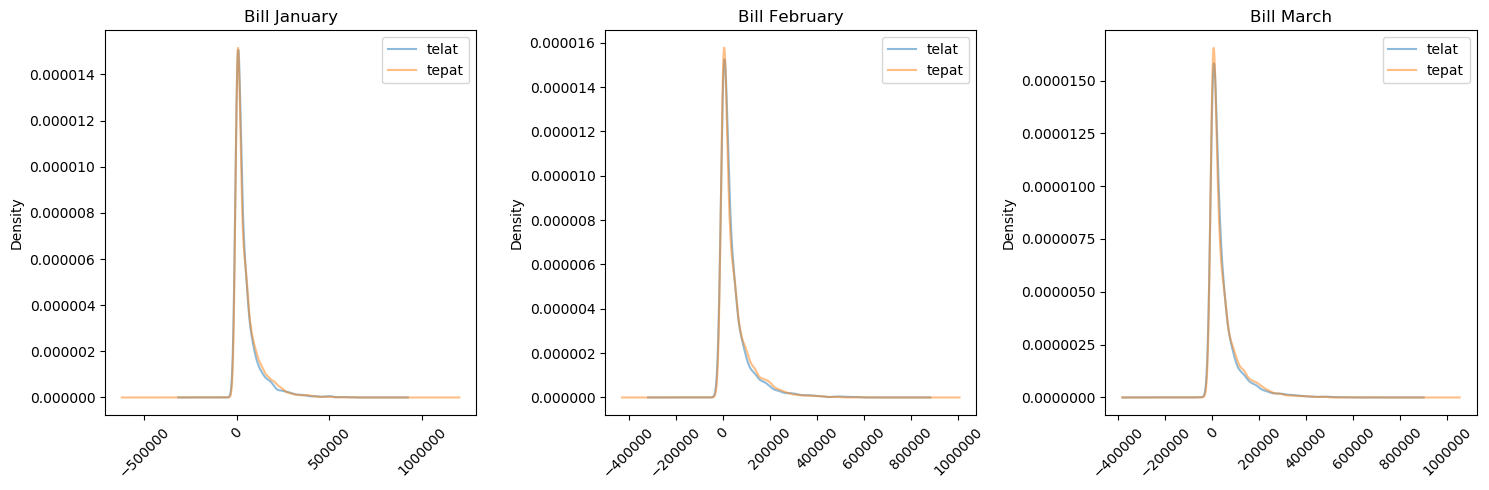

In [639]:
plt.figure(figsize=(15,5))
plt.subplot(131)
kredit.groupby('TARGET').BILL_AMT1.plot.density(alpha=0.5, legend=True, title='Bill January', rot=45)
plt.subplot(132)
kredit.groupby('TARGET').BILL_AMT2.plot.density(alpha=0.5, legend=True, title='Bill February', rot=45)
plt.subplot(133)
kredit.groupby('TARGET').BILL_AMT3.plot.density(alpha=0.5, legend=True, title='Bill March', rot=45)
plt.tight_layout()
plt.show()

**Categoric Variable vs Target**

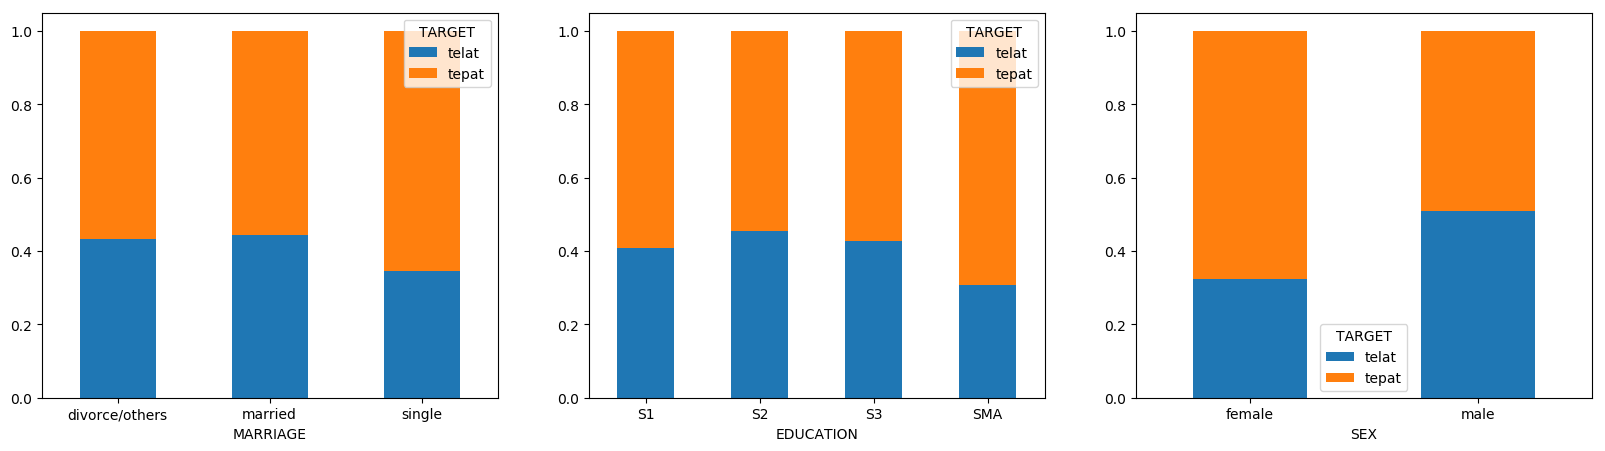

In [640]:
fig,(ax1,ax2,ax3)= plt.subplots(ncols=3)
fig.set_size_inches(20,5)
eduOrder = ["SMA","S1","S2","S3"]
marrOrder = ["single","married","divorce/others"]

pd.crosstab(kredit['MARRIAGE'], kredit['TARGET'],normalize='index').plot.bar(rot=0,stacked=True,ax=ax1)
pd.crosstab(kredit['EDUCATION'], kredit['TARGET'],normalize='index').plot.bar(rot=0,stacked=True,ax=ax2)
pd.crosstab(kredit['SEX'], kredit['TARGET'],normalize='index').plot.bar(rot=0,stacked=True,ax=ax3)

### CORRELATION PLOT

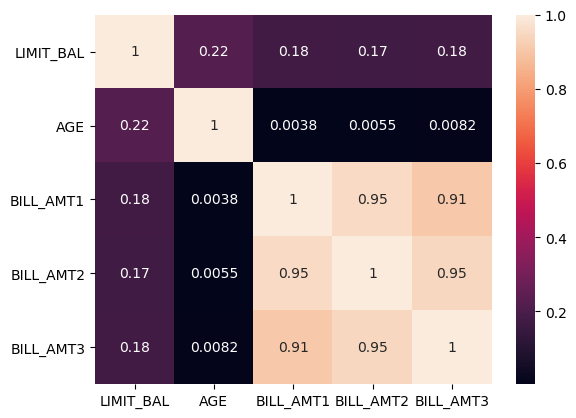

In [641]:
import seaborn as sns
sns.heatmap(kredit.corr(), annot=True)

### DUMMY VARIABLES

In [642]:
kredit_d = pd.get_dummies(kredit, columns=['MARRIAGE', 'EDUCATION', 'SEX'], drop_first=bool)

In [643]:
kredit_d["TARGET"] = kredit_d["TARGET"].map({"tepat" : 0, "telat" : 1 })

In [644]:
kredit_d.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,TARGET,MARRIAGE_married,MARRIAGE_single,EDUCATION_S2,EDUCATION_S3,EDUCATION_SMA,SEX_male
ID,,,,,,,,,,,,
1,30000.0,40,24607.0,24430.0,23881.0,0,1,0,0,0,1,0
2,20000.0,41,17040.0,16474.0,17203.0,0,1,0,0,0,1,0
3,20000.0,36,17332.0,18600.0,17947.0,0,1,0,0,0,1,0
4,20000.0,35,2003.0,2948.0,3372.0,0,1,0,0,0,1,0
5,170000.0,38,171465.0,145196.0,110163.0,0,1,0,0,0,1,0


## TRAIN TEST SPLIT

In [645]:
X=kredit_d.drop(['TARGET'],1)
Y=kredit_d['TARGET']
train_X,test_X,train_y,test_y =train_test_split(X,Y,test_size=0.2,random_state=123)

## Logistic Regression

 #### Logistic Regression Modeling

In [646]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Prediction

In [647]:
logregpred = logreg.predict(test_X)

#### Summary

In [648]:
print('Intercept : \n', logreg.intercept_)
coef = pd.concat([pd.DataFrame(X.columns),
                  pd.DataFrame(np.transpose(logreg.coef_))], 
                 axis = 1)
coef

Intercept : 
 [3.16922525e-05]


,0,0
0,LIMIT_BAL,-4.666670e-06
1,AGE,9.317612e-03
2,BILL_AMT1,-2.487624e-06
3,BILL_AMT2,8.408255e-07
4,BILL_AMT3,1.434886e-06
5,MARRIAGE_married,1.893383e-04
6,MARRIAGE_single,-1.576506e-04
7,EDUCATION_S2,1.578833e-04
8,EDUCATION_S3,5.490406e-06
9,EDUCATION_SMA,-1.535671e-04


#### Confusion Matrix

In [649]:
cm = confusion_matrix(test_y,logregpred)

total=sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])

print('Confusion Matrix : \n', cm)
print('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

Confusion Matrix : 
 [[1463  589]
 [ 631  642]]
Accuracy :  0.6330827067669172
Sensitivity :  0.5043205027494109
Specificity :  0.7129629629629629


### STEPWISE 

In [650]:
import statsmodels.api as sm
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [651]:
koef = stepwise_selection(train_X,train_y)
print(koef)

C:\Users\petron059243\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


Add  AGE                            with p-value 2.97716e-147
Add  LIMIT_BAL                      with p-value 9.08509e-208
Add  SEX_male                       with p-value 3.42933e-82
Add  MARRIAGE_married               with p-value 5.01536e-49
Add  EDUCATION_SMA                  with p-value 7.35926e-31
Add  EDUCATION_S2                   with p-value 4.64161e-14
['AGE', 'LIMIT_BAL', 'SEX_male', 'MARRIAGE_married', 'EDUCATION_SMA', 'EDUCATION_S2']


In [652]:
lm1 = smf.ols(formula='TARGET~AGE+LIMIT_BAL+SEX_male+MARRIAGE_married+EDUCATION_SMA+EDUCATION_S2', data=kredit_d).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     537.9
Date:                Sun, 24 Jun 2018   Prob (F-statistic):               0.00
Time:                        22:37:00   Log-Likelihood:                -10246.
No. Observations:               16625   AIC:                         2.051e+04
Df Residuals:                   16618   BIC:                         2.056e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.2315      0.019    -12.164      0.000      -0.269      -0.194
AGE                  0.0152      0.000     37.047      0.000       0.014       0.016
LIMIT_BAL        -1.008e-06   2.88e-08    -35.028      0.000   -1.06e-06   -9.52e-07
SEX_male             0.1333      0.007     18.561      0.000       0.119       0.147
MARRIAGE_married     0.1345      0.007     18.933      0.000       0.121       0.148
EDUCATION_SMA       -0.0805      0.009     -8.989      0.000      -0.098      -0.063
EDUCATION_S2         0.0704      0.008      8.630      0.000       0.054       0.086
==============================================================================
Omnibus:                      164.807   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1517.141
Skew:                           0.247   Prob(JB):                         0.00
Kurtosis:                       1.605   Cond. No.                     1.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [653]:
logpred2 = lm1.predict(test_X)

## DECISION TREE

#### Decision Tree Modelling

In [654]:
decisiontree = DecisionTreeClassifier(random_state = 123)
decisiontree.fit(train_X, train_y)
dtpred = decisiontree.predict(test_X)

#### Confusion Matrix

In [655]:
cm1 = confusion_matrix(test_y,dtpred)

total1=sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

print('Confusion Matrix : \n', cm1)
print('Accuracy : ', accuracy1)
print('Sensitivity : ', sensitivity1 )
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1717  335]
 [ 306  967]]
Accuracy :  0.807218045112782
Sensitivity :  0.7596229379418696
Specificity :  0.8367446393762183
